In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Convolutions condensr the image down to the important features that distinguish 
# what makes it a shoe, a handbag or a shirt.
#convolutions when combined with pooling become really powerful.
#put simply, pooling is a way of compressing an image.


Convolutions  narrow down the content of the image to focus on specific, distinct, details.

Input layer in the shape of our data
<p>Output layer in the shape of the number of categories we are trying to define.
<p>Hidden layer in the middle

<p><b>Convolution:</b>You are passing a filter over the image in order to change the underlying image
<p>Convolution + Pooling is used for ( Filtering and Compressing)
<p><b>Pooling:</b> A way of compressing an image
<p>Basically by pooling you preserve the features that were highlighted by the convolution.


In [3]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
training_images.shape


(60000, 28, 28, 1)

By passing filters over an image to reduce the amount of information, they then allowed the neural network to effectively extract features that can distinguish one class of image from another

In [5]:
model = tf.keras.models.Sequential([
                                    #Here we're specifying the first convolution.
                                    #We're asking keras to generate 64 filters for us. 
                                    #These filters are 3 by 3, their activation is relu, which means the 
                                    #negative values will be thrown way, and finally the input shape
                                    #is as before, the 28 by 28.
                                    #That extra 1 just means that we are tallying using a single byte for color depth.
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                                    #it's maxpooling because we are going to take the maximum value
                                    #for every 4 pixels the biggest one will survive
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    # the goal is that the convolutions will filter it to features that determine 
                                    #the output
                                    tf.keras.layers.Flatten(), 
                                    #128 neurons
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    #10 neurons
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
#there are 64 new images of 5x5
#=1600
#So, you can see that the new flattened layer has 1,600 elements in it, as opposed to the 784 that you had previously.

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.4425 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2937 - accuracy: 0.8922
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2497 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2147 - accuracy: 0.9203
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2571 - accuracy: 0.9071


In [ ]:
#This model used 2 convolution layers both with 64 filters of 3x3
#it also used 5 epochs
#the accuracy on the training is 0.9293 and on the testing is 0.9071

<h2> <b>Effect of changing the number of Filters</b>

<p>Next I will try 32 filters instead of 64



In [25]:
model2 = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model2.summary()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(training_images, training_labels, epochs=5)
test_loss = model2.evaluate(test_images, test_labels)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
#This model used 2 convolution layers both with 32 filters of 3x3
#it also used 5 epochs
#the accuracy on the training reduced from 0.9293 to 0.9172 and reduced on the testing from 0.9071 to 0.9042

<h2> <b>Effect of changing the number of Convolution Layers</b>

<p>Next I will try 3 convolutional layers instead of 2

In [26]:
model3 = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),                                   

                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model3.summary()
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(training_images, training_labels, epochs=5)
test_loss = model3.evaluate(test_images, test_labels)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)               

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [11]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


0, 23rd and 28th labels are all 9
<p>2,3 and 5 are trousers
<p>4, 7 , 26 are shirts





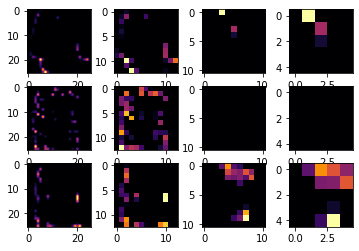

In [21]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=4
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 3
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)